In [1]:
import pandas as pd

In [4]:
import numpy as np
x= np.array([1,2,3,4,5])
np.append(x, 6)
x

array([1, 2, 3, 4, 5])

In [ ]:
import numpy as np
x = np.array([])
for i in range(5):
    x = np.append(x, 1).astype(int


array([1, 1, 1, 1, 1])

In [3]:
import numpy as np
x = np.array([1,2,3])
y = np.array([4,5,6])
x = np.append(x,y)
x

array([1, 2, 3, 4, 5, 6])

In [ ]:
import numpy as np
x = np.array([[2,3,4], 
              [2,3,4], 
              [2,3,4]])
x = np.concatenate([x[:, i] for i in range(3)])
x

array([2, 2, 2, 3, 3, 3, 4, 4, 4])

In [9]:
import numpy as np
np.expand_dims([[[5, 5]]], axis = 3) 

array([[[[5],
         [5]]]])

In [13]:
df = pd.read_csv("C:/Users/omgui/Desktop/DLBAS/100nm_Tetraspecs/100nm_TetraSpec_FS_1.txt", skiprows = 12, delimiter = "\t", header = None)

In [15]:
df

,0,1,2
0,51525,146344,170485
1,191018,285491,259840
2,423042,295412,272297
3,490781,316403,273059
4,559254,365372,277328
...,...,...,...
1403486,0,0,60749660205
1403487,0,0,60749735489
1403488,0,0,60749761782
1403489,0,0,60749915971


In [4]:
import numpy as np
np.arange(1,101)

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])

In [4]:
from datetime import datetime
print(type(str(datetime.now())))

<class 'str'>


In [8]:
(True + 1)

2

In [12]:
if 4:
    print(5)

5


In [2]:
import os
print(type(os.path.join("dfd", "dfijdf")))

<class 'str'>


In [1]:
import numpy as np
import matplotlib.pyplot as plt
x = np.load('../strikeamp.npy')

In [2]:
x = x[x>0]

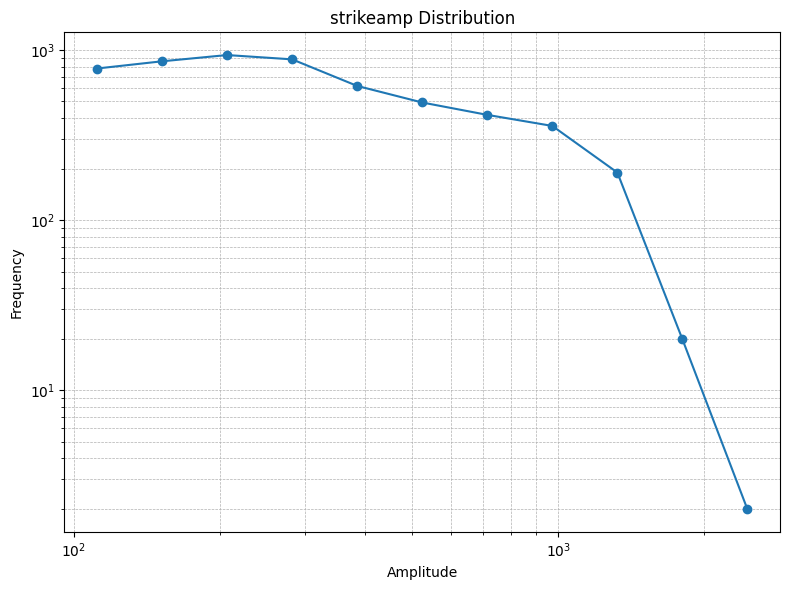

In [3]:
counts, bin_edges = np.histogram(x, bins=np.logspace(np.log10(np.min(x)), np.log10(np.max(x)), 12))

# Calculate bin centers for plotting
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Plot on log-log scale
plt.figure(figsize=(8, 6))
plt.loglog(bin_centers, counts, marker='o', linestyle='-')
plt.title("strikeamp Distribution")
plt.xlabel("Amplitude")
plt.ylabel("Frequency")
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.tight_layout()
plt.show()


In [4]:
len(x)

5562

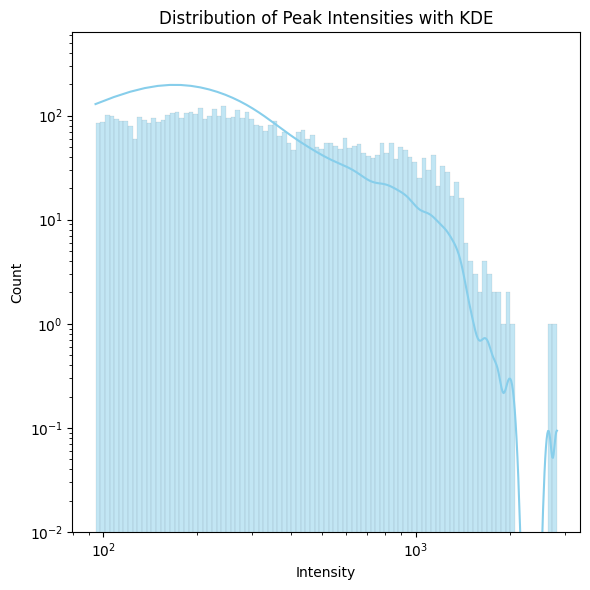

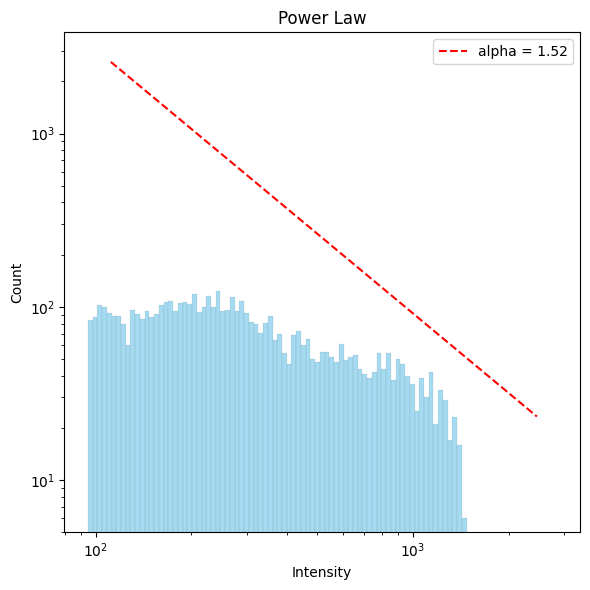

In [ ]:
from scipy.stats import linregress
import seaborn as sns
import plotly.graph_objects as go
peak_heights = x
#LOG-SPACED BINNING - WITH KDE
min_val, max_val = np.min(peak_heights), np.max(peak_heights)
log_bins = np.logspace(np.log10(min_val), np.log10(max_val), 500)


plt.figure(figsize=(6, 6))
sns.histplot(peak_heights, bins=log_bins, kde=True, color='skyblue', edgecolor='black')

plt.xscale('log')
plt.yscale('log')

plt.xlabel("Intensity")
plt.ylabel("Count")
plt.title("Distribution of Peak Intensities with KDE")
plt.ylim(bottom=0.01)
plt.tight_layout()
#plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.show()

peak_heights = x
nonzero = counts > 0
log_x = np.log10(bin_centers[nonzero])
log_y = np.log10(counts[nonzero])


slope, intercept, r_value, p_value, std_err = linregress(log_x, log_y)
alpha = -slope


plt.figure(figsize=(6, 6))
sns.histplot(peak_heights, bins=log_bins, kde=False, color='skyblue', edgecolor='black')
plt.plot(10**log_x, 10**(intercept + slope * log_x), 'r--', label=f'alpha = {alpha:.2f}')
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Intensity")
plt.ylabel("Count")
plt.title("Power Law")
plt.legend()
plt.ylim(bottom=5)
plt.tight_layout()
#plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.show()

results = {
    "alpha": alpha,
    "intercept": intercept,
    "r": r_value,
    "p_value": p_value,
    "std_err": std_err,
    "slope": slope
}


In [30]:
print(results)

{'alpha': np.float64(1.1780264861121803), 'intercept': np.float64(5.02678506764606), 'r': np.float64(-0.8106177626112234), 'p_value': np.float64(8.665274652456819e-12), 'std_err': np.float64(0.12829082874142383), 'slope': np.float64(-1.1780264861121803)}


In [72]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import BayesianGaussianMixture
from scipy.signal import find_peaks
import pandas as pd


with open(r"C:\Users\omgui\Desktop\BASDL\100nm_Tetraspecs\100nm_TetraSpec_FS_1.txt", "r") as f:
    lines = f.readlines()
photons_toas = []
for i in range(12, 1058882):
    photons_toas.append(int(lines[i].split()[0]) * 82.31 * 10e-12)

In [100]:

# Simulated example of photon arrival timestamps in seconds (user-provided format)
photon_timestamps = np.array(photons_toas)

# Step 1: Bin photon timestamps to create a time-intensity trace
bin_width = 500e-6  # 100 ms bins
time_start = np.min(photon_timestamps)
time_end = np.max(photon_timestamps)
bins = np.arange(time_start, time_end + bin_width, bin_width)
counts, edges = np.histogram(photon_timestamps, bins=bins)
bin_centers = (edges[:-1] + edges[1:]) / 2

# Step 2: Identify bursts using a basic threshold
threshold = np.mean(counts) + 2 * np.std(counts)
burst_indices = np.where(counts > threshold)[0]
print(burst_indices)
# Step 3: Extract burst features (here, just total counts and duration)
burst_features = []
for idx in burst_indices:
    start_time = edges[idx]
    end_time = edges[idx + 1]
    photon_count = counts[idx]
    duration = end_time - start_time
    burst_features.append([photon_count, duration])

burst_features = np.array(burst_features)

# Step 4: Apply Bayesian Gaussian Mixture to identify populations
if len(burst_features) > 0:
    bgm = BayesianGaussianMixture(n_components=5, covariance_type='full', random_state=42)
    labels = bgm.fit_predict(burst_features)
    burst_df = pd.DataFrame(burst_features, columns=["Photon_Count", "Duration"])
    burst_df["Cluster_Label"] = labels
else:
    burst_df = pd.DataFrame(columns=["Photon_Count", "Duration", "Cluster_Label"])

burst_df.corr(method='spearman')

[  615   616   617 ... 99757 99758 99760]


c:\Users\omgui\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning:

Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.



,Photon_Count,Duration,Cluster_Label
Photon_Count,1.000000,0.025353,0.148593
Duration,0.025353,1.000000,0.005689
Cluster_Label,0.148593,0.005689,1.000000


In [91]:
burst_df["Photon_Count"]
burst_df["Cluster_Label"]
burst_df["Duration"]

0       0.0005
1       0.0005
2       0.0005
3       0.0005
4       0.0005
         ...  
3461    0.0005
3462    0.0005
3463    0.0005
3464    0.0005
3465    0.0005
Name: Duration, Length: 3466, dtype: float64

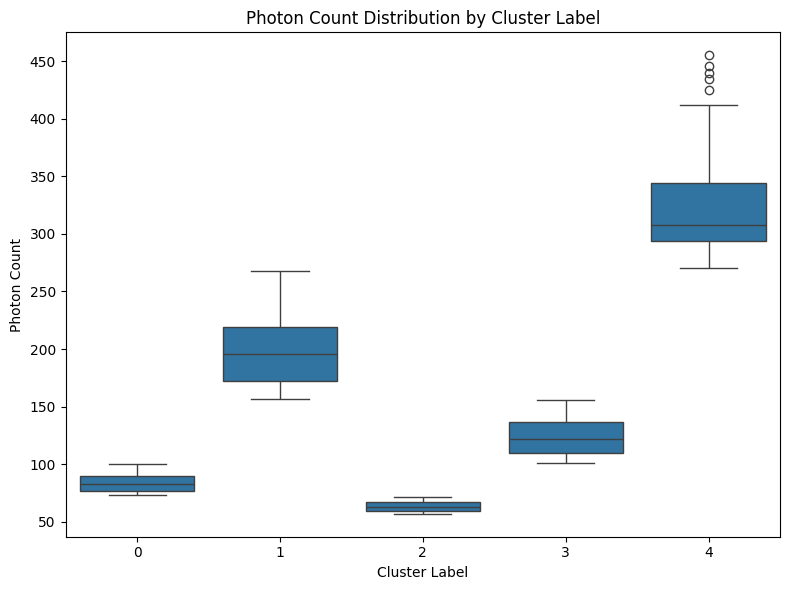

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(x=burst_df["Cluster_Label"], y=burst_df["Photon_Count"])
plt.xlabel("Cluster Label")
plt.ylabel("Photon Count")
plt.title("Photon Count Distribution by Cluster Label")
plt.tight_layout()
plt.show()

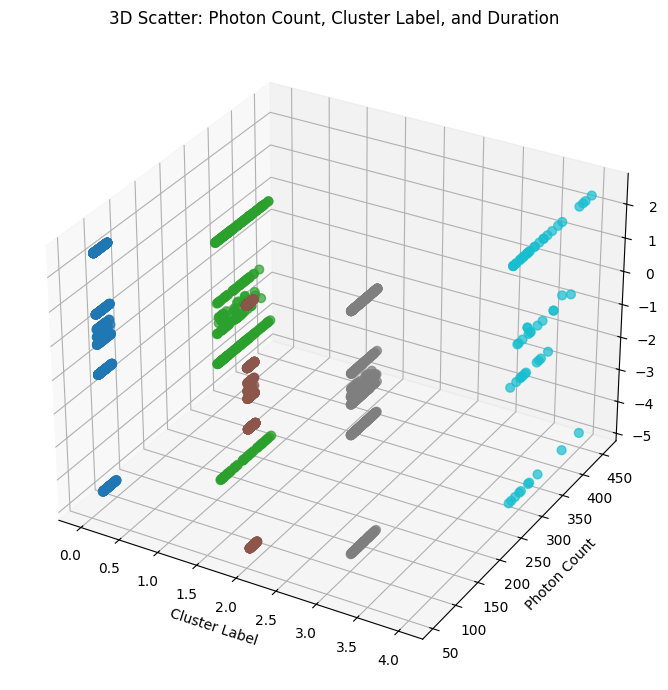

In [96]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(
    burst_df["Cluster_Label"], 
    burst_df["Photon_Count"], 
    burst_df["Duration"], 
    c=burst_df["Cluster_Label"], 
    cmap='tab10', 
    s=40, 
    alpha=0.7
)
ax.set_xlabel("Cluster Label")
ax.set_ylabel("Photon Count")
ax.set_zlabel("Duration")
ax.set_title("3D Scatter: Photon Count, Cluster Label, and Duration")
plt.tight_layout()
plt.show()

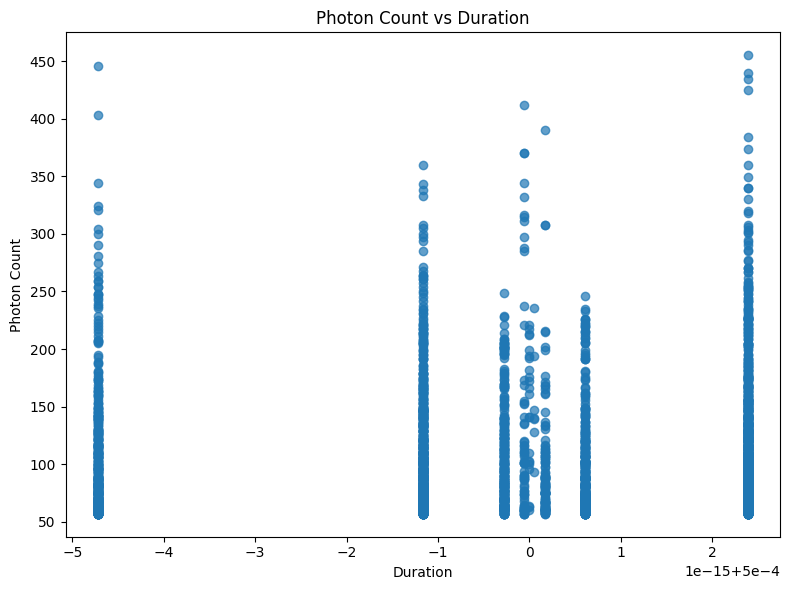

In [93]:
# 2D scatter plot: Photon Count vs Duration
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(burst_df["Duration"], burst_df["Photon_Count"], alpha=0.7)
plt.xlabel("Duration")
plt.ylabel("Photon Count")
plt.title("Photon Count vs Duration")
plt.tight_layout()
plt.show()

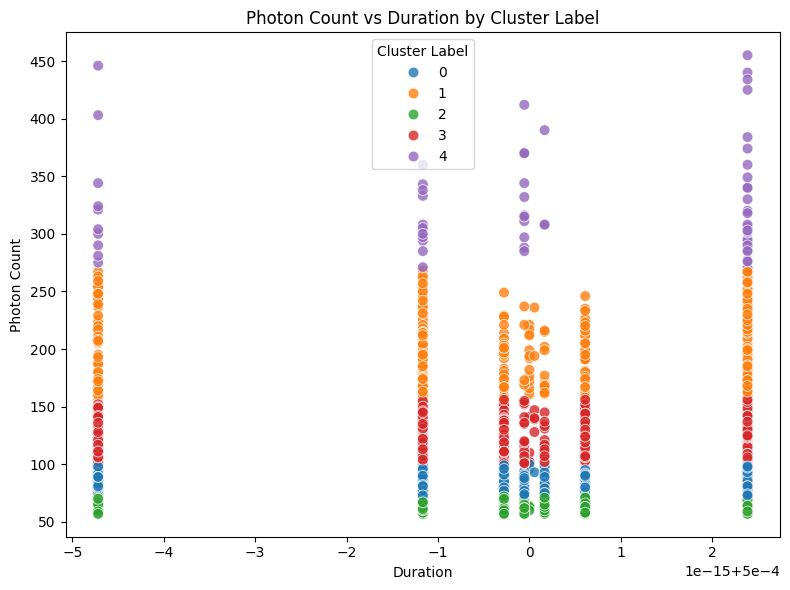

In [97]:
# 2D scatter plot: Photon Count vs Duration, colored by Cluster Label
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=burst_df,
    x="Duration",
    y="Photon_Count",
    hue="Cluster_Label",
    palette="tab10",
    alpha=0.8,
    s=60
)
plt.xlabel("Duration")
plt.ylabel("Photon Count")
plt.title("Photon Count vs Duration by Cluster Label")
plt.legend(title="Cluster Label")
plt.tight_layout()
plt.show()

C:\Users\omgui\AppData\Local\Temp\ipykernel_26012\2098416044.py:19: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



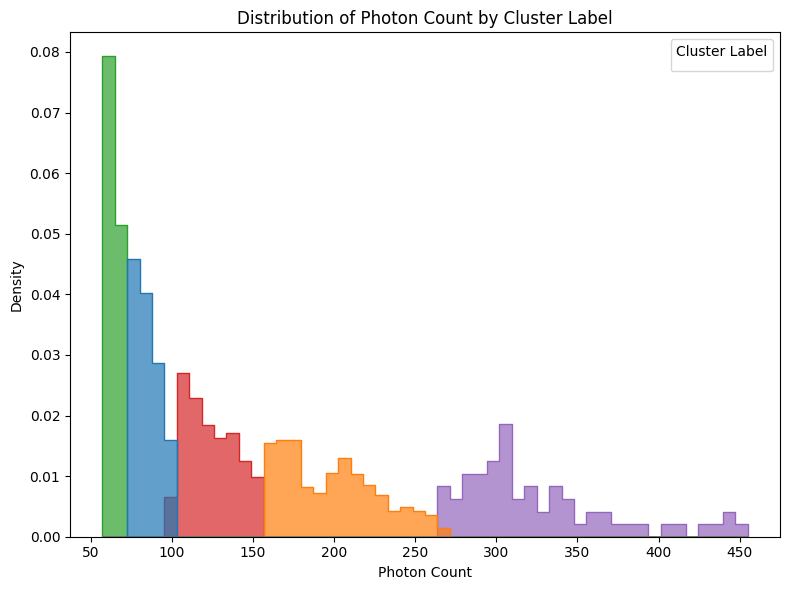

In [98]:
# Distribution of Photon Count colored by Cluster Label
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(
    data=burst_df,
    x="Photon_Count",
    hue="Cluster_Label",
    element="step",
    stat="density",
    common_norm=False,
    palette="tab10",
    alpha=0.7
)
plt.xlabel("Photon Count")
plt.ylabel("Density")
plt.title("Distribution of Photon Count by Cluster Label")
plt.legend(title="Cluster Label")
plt.tight_layout()
plt.show()

In [ ]:
np.argmax(burst_df["Cluster_Label"])
burst_df["Cluster_Label"].iloc[4]

,Photon_Count,Duration,Cluster_Label
0,64.0,0.0005,2
1,96.0,0.0005,0
2,103.0,0.0005,3
3,161.0,0.0005,1
4,166.0,0.0005,1
